In [60]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam


workdir = "E://Ronny_TF//Ronny_IC50_RMSE//method_comparison//dataset//ccle_exp_mut_dataset"


In [61]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12030721447898187753
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6006989415
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17809312516401922858
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [62]:
dataset = np.load(workdir + "//190510_ccle_cell_gdsc_mut_drug_info.npz")
ss0 = np.load(workdir + '//190510_ccle_cell_gdsc_mut_drug_info_r0_9_1.npz')

In [63]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [64]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [65]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 1


In [66]:
x.shape

(8727, 23538)

In [67]:
training_image_array.shape

(7855, 23538)

In [68]:
# In[21]:

num_classes = 1
learning_rate = 0.002
training_epochs = 5
batch_size = 101
img_rows, img_cols = 154, 154


In [69]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [70]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [71]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [85]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [86]:
inds = np.where(np.isnan(test_X))

In [87]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [88]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 23538)
7855 train samples
872 test samples


In [89]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR()
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


C:\ProgramData\Anaconda3\envs\ronnytf\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X, training_label_array);

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [90]:
import matplotlib
from matplotlib import pyplot as plt

In [91]:
y_lin

array([ 1.97684581,  1.78256969,  1.98200778, -2.8246756 , -0.58373805,
        1.97375931,  1.95450769,  1.86656172,  1.98989638,  1.97934467,
        1.55609051,  1.9439122 ,  1.92132136,  1.98179206, -0.80713743,
        1.97194864,  1.96854402,  1.97361206,  1.77089285,  1.97172304,
        1.95378142,  1.98323106,  1.97430878, -2.82172697,  1.97916259,
        1.97957334,  1.97170914, -0.61050999,  1.92114633, -0.6247575 ,
        1.97958591,  1.98516624,  1.9792699 ,  1.92964053,  1.96198474,
        1.97951339,  1.94461713,  1.95168923, -0.63729461,  1.92991834,
        1.98628303,  1.91818313,  1.97177265,  1.94569184, -0.6586641 ,
        1.96269946,  1.95452242,  1.86651011, -0.80219801,  1.97954712,
        1.97896981,  1.55843455,  1.9653793 ,  1.89600461,  1.97952194,
        1.98499469, -0.64637671,  2.01045491,  1.97664331, -0.80526427,
       -0.64192697,  1.9793181 ,  1.77677194, -0.61463385,  1.86671402,
        1.98229896, -2.82217259,  1.98239669,  1.9782399 , -2.82

In [92]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [93]:
workdir = "E://Ronny_TF//Ronny_IC50_RMSE//method_comparison//190511_ccle_gdsc_mut_drug_info_SVR"
c.to_csv(workdir + '//190511_SVR_ccle_gdsc_mut_drug_info_result.csv')

In [94]:
c

,Predicted,Test
0,1.976846,0.941970
1,1.782570,0.225864
2,1.982008,1.677600
3,-2.824676,-4.869996
4,-0.583738,-0.246987
5,1.973759,1.729042
6,1.954508,2.079442
7,1.866562,1.510771
8,1.989896,2.079442
9,1.979345,2.079442


In [95]:
c.shape

(872, 2)

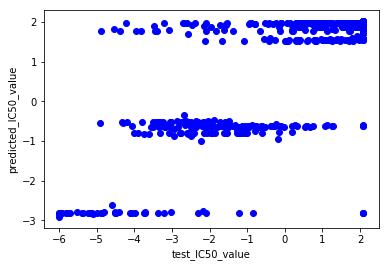

In [96]:
plt.scatter(test_label_array,y_lin,c='blue')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//190511_SVR_ccle_gdsc_mut_drug_info_test_scatterplot.png')

In [97]:
rse = ((test_label_array-y_lin)**2).sum()
mse = np.mean((test_label_array-y_lin)**2)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.3818743048771578


In [ ]:
predicted_classes.shape

In [ ]:
test_X.shape

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from tensorflow.keras.utils import to_categorical

In [ ]:
quan25 = np.percentile(test_label_array,25)
quan50 = np.percentile(test_label_array,50)
quan75 = np.percentile(test_label_array,75)


In [ ]:
test_class_array = []

for x in range(len(test_label_array)):
    if test_label_array[x] <= quan25:
        test_class_array.append(0)
    elif quan25 < test_label_array[x] <= quan50:
        test_class_array.append(1)
    elif quan50 < test_label_array[x] <= quan75:
        test_class_array.append(2)
    else:
        test_class_array.append(3)

print("class 1 : %i" % test_class_array.count(0))
print("class 2 : %i" % test_class_array.count(1))
print("class 3 : %i" % test_class_array.count(2))
print("class 4 : %i" % test_class_array.count(3))
test_class_array = np.asarray(test_class_array, dtype='int32', order='C')

In [ ]:
predicted_value.shape

In [ ]:
pred_class_array = []

for x in range(len(predicted_value)):
    if predicted_value[x] <= quan25:
        pred_class_array.append(0)
    elif quan25 < predicted_value[x] <= quan50:
        pred_class_array.append(1)
    elif quan50 < predicted_value[x] <= quan75:
        pred_class_array.append(2)
    else:
        pred_class_array.append(3)

print("class 1 : %i" % pred_class_array.count(0))
print("class 2 : %i" % pred_class_array.count(1))
print("class 3 : %i" % pred_class_array.count(2))
print("class 4 : %i" % pred_class_array.count(3))

pred_class_array = np.asarray(pred_class_array, dtype='int32')

In [ ]:
# correct = np.where(predicted_classes==test_label_array)[0]
# print("Found %d correct labels" % len(correct))
# for i, correct in enumerate(correct[:5]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(test_X[correct].reshape(167,167), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_label_array[correct]))
#     plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i+1) for i in range(num_classes)]
print(classification_report(test_class_array, pred_class_array, target_names=target_names))

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_class_array[:, i], pred_class_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(test_class_array.ravel(), pred_class_array.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
